In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
df_original = pd.read_csv('Desktop/Thinkful/states_all.csv')
df_original.head(2)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712


In [7]:
# Make copy of dataframe
df = df_original.copy()
# Create a list of all columns we want to work on.
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]
# Fill in all missing values from the column with the average of the same column
states = df["STATE"].unique()

for col in fill_list:
    for state in states: 
        if len(df.loc[df["STATE"] == state][col].unique())==1: 
            #col value is all null for that year, then fill it with 0 
            df.loc[df["STATE"] == state,  col]= df.loc[df["STATE"] == state,  col].fillna(0)
        else: 
            df.loc[df["STATE"] == state,  col] = df.loc[df["STATE"] == state, col].fillna(df[(df["STATE"] == state) & (df[col].isnull()==False) ][col].mean())

In [10]:
df.dropna(inplace=True)

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [11]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,...,474.000000,474.000000,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,474.000000,474.000000,474.000000,474.000000
mean,2008.305907,9.361091e+05,1.022744e+07,9.138917e+05,4.735114e+06,4.578437e+06,1.033222e+07,5.340472e+06,3.018713e+06,4.724543e+05,...,71666.962283,72100.193754,63169.257890,5.773327e+05,2.818975e+05,8.803596e+05,236.541353,279.511266,219.305086,263.772645
std,6.096588,1.109629e+06,1.278973e+07,1.286594e+06,6.018853e+06,5.945396e+06,1.302991e+07,6.834664e+06,3.637876e+06,5.756065e+05,...,85289.992828,84764.526628,75380.047881,6.846149e+05,3.348811e+05,1.042943e+06,9.159956,9.695064,7.698038,6.834157
min,1992.000000,4.417900e+04,6.452330e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.387840e+05,3.182600e+05,1.949150e+05,2.191000e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,178.557612,236.379102
25%,2005.000000,2.754622e+05,2.632283e+06,2.454088e+05,1.366463e+06,9.244182e+05,2.599182e+06,1.386642e+06,7.717332e+05,1.217677e+05,...,20433.500000,20792.000000,18503.250000,1.658642e+05,8.163050e+04,2.592820e+05,232.062602,274.436276,215.044071,259.762432
50%,2009.000000,6.625380e+05,5.976691e+06,5.322620e+05,2.909922e+06,2.335014e+06,5.954101e+06,3.017036e+06,1.797826e+06,3.192735e+05,...,50381.000000,49748.500000,40699.875000,4.037075e+05,1.844455e+05,6.188510e+05,238.289254,281.369105,220.928176,265.136000
75%,2013.000000,1.013568e+06,1.166152e+07,9.888300e+05,5.873058e+06,5.147047e+06,1.138144e+07,5.897824e+06,3.459724e+06,5.463162e+05,...,78853.500000,80820.000000,74271.250000,6.378688e+05,3.181618e+05,9.681875e+05,242.557845,286.154375,224.488094,268.275364
max,2017.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


1. if we are looking at the mean of total revenue and total expenditure - schools spend more than receiving - the budget deficit
2. FEDERAL_REVENUE is the biggest 
3. then less total revenue - then less deficit
4. INSTRUCTION_EXPENDITURE is the biggest expense
5. AVG_MATH_SCORE is higher

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


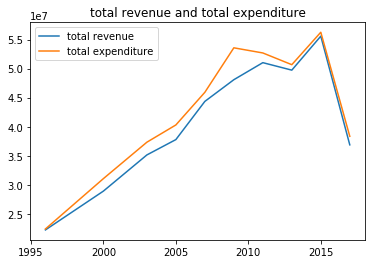

In [16]:
plt.plot(df.loc[df.STATE == "TEXAS", "YEAR"], df.loc[df.STATE == 'TEXAS', "TOTAL_REVENUE"], label="total revenue")
plt.plot(df.loc[df.STATE == "TEXAS", "YEAR"], df.loc[df.STATE == 'TEXAS', "TOTAL_EXPENDITURE"], label="total expenditure")
plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

## 3. In your chosen state, which of the lessons are the students more successful, math or reading?


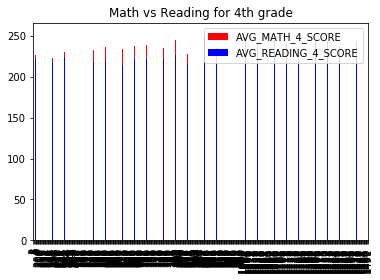

In [44]:

MATH_4_SCORE = df.AVG_MATH_4_SCORE
MATH_8_SCORE = df.AVG_MATH_8_SCORE

READING_4_SCORE = df.AVG_READING_4_SCORE   
READING_8_SCORE = df.AVG_READING_8_SCORE   

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.065

MATH_4_SCORE.plot(kind='bar', color='red', ax=ax, width=width)
READING_4_SCORE.plot(kind='bar', color='blue', ax=ax, width=width)

ax.legend(loc='upper right')


from matplotlib.pyplot import figure

fig.set_size_inches(10.5, 5.5)
fig.savefig('test2png.png', dpi=100)

plt.title('Math vs Reading for 4th grade')

plt.show()

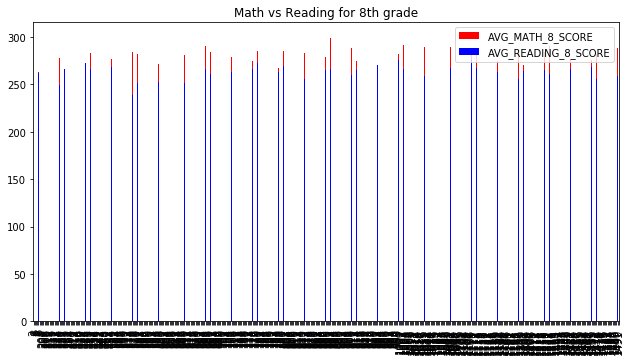

In [46]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.065

MATH_8_SCORE.plot(kind='bar', color='red', ax=ax, width=width)
READING_8_SCORE.plot(kind='bar', color='blue', ax=ax, width=width)

ax.legend(loc='upper right')


from matplotlib.pyplot import figure

fig.set_size_inches(10.5, 5.5)
fig.savefig('test2png.png', dpi=100)

plt.title('Math vs Reading for 8th grade')

plt.show()

## 4. What are the distributions of the math and reading scores in the sample?


Text(0.5, 1.0, 'the distributions of AVG_READING_8_SCORE')

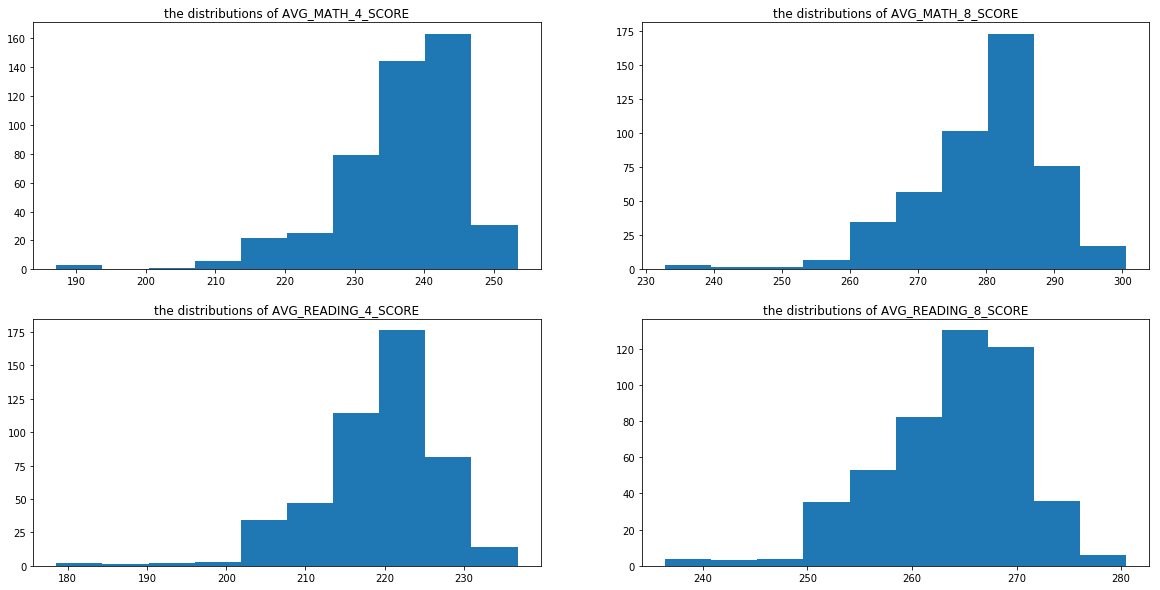

In [36]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df.AVG_MATH_4_SCORE)
plt.title("the distributions of AVG_MATH_4_SCORE")

plt.subplot(2,2,2)
plt.hist(df.AVG_MATH_8_SCORE)
plt.title("the distributions of AVG_MATH_8_SCORE")

plt.subplot(2,2,3)
plt.hist(df.AVG_READING_4_SCORE)
plt.title("the distributions of AVG_READING_4_SCORE")

plt.subplot(2,2,4)
plt.hist(df.AVG_READING_8_SCORE)
plt.title("the distributions of AVG_READING_8_SCORE")

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.


Text(0.5, 1.0, 'the distributions of AVG_MATH_4_SCORE - interpolate')

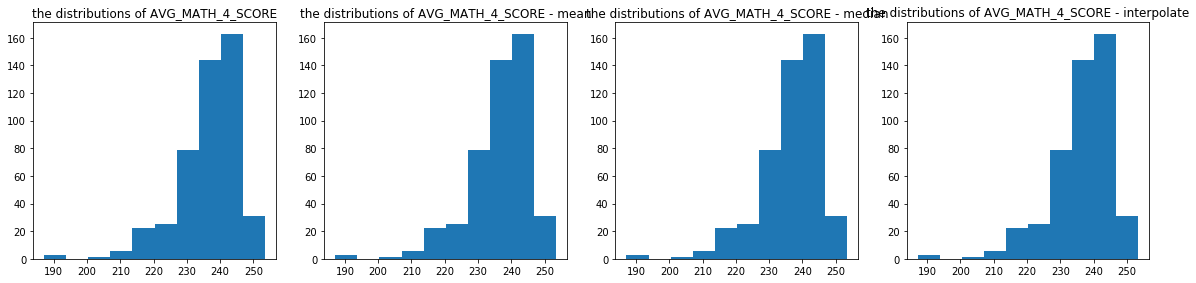

In [37]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_4_SCORE)
plt.title("the distributions of AVG_MATH_4_SCORE")

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean()))
plt.title("the distributions of AVG_MATH_4_SCORE - mean")

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median()))
plt.title("the distributions of AVG_MATH_4_SCORE - median")

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_4_SCORE.interpolate())
plt.title("the distributions of AVG_MATH_4_SCORE - interpolate")



Text(0.5, 1.0, 'the distributions of AVG_MATH_8_SCORE - interpolate')

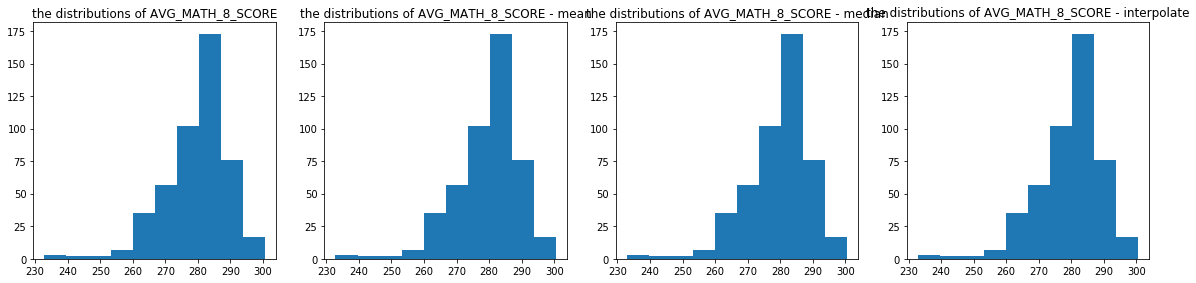

In [38]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_8_SCORE)
plt.title("the distributions of AVG_MATH_8_SCORE")

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean()))
plt.title("the distributions of AVG_MATH_8_SCORE - mean")

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median()))
plt.title("the distributions of AVG_MATH_8_SCORE - median")

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_8_SCORE.interpolate())
plt.title("the distributions of AVG_MATH_8_SCORE - interpolate")



Text(0.5, 1.0, 'the distributions of AVG_READING_4_SCORE - interpolate')

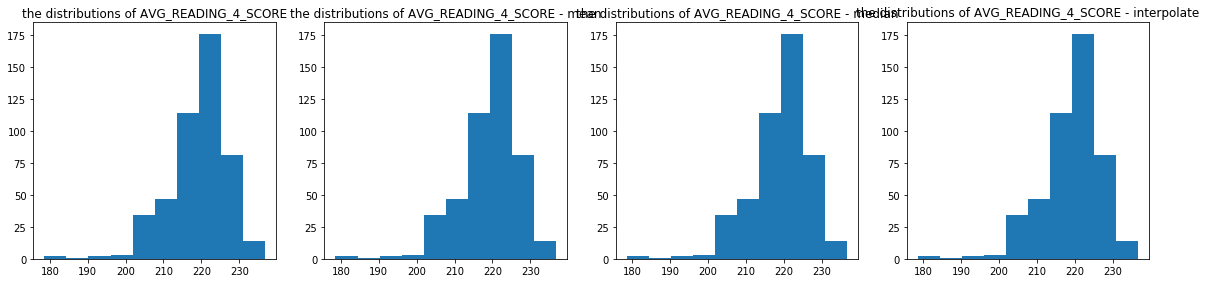

In [39]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_READING_4_SCORE)
plt.title("the distributions of AVG_READING_4_SCORE")

plt.subplot(4,4,2)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean()))
plt.title("the distributions of AVG_READING_4_SCORE - mean")

plt.subplot(4,4,3)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median()))
plt.title("the distributions of AVG_READING_4_SCORE - median")

plt.subplot(4,4,4)
plt.hist(df.AVG_READING_4_SCORE.interpolate())
plt.title("the distributions of AVG_READING_4_SCORE - interpolate")


Text(0.5, 1.0, 'the distributions of AVG_READING_8_SCORE - interpolate')

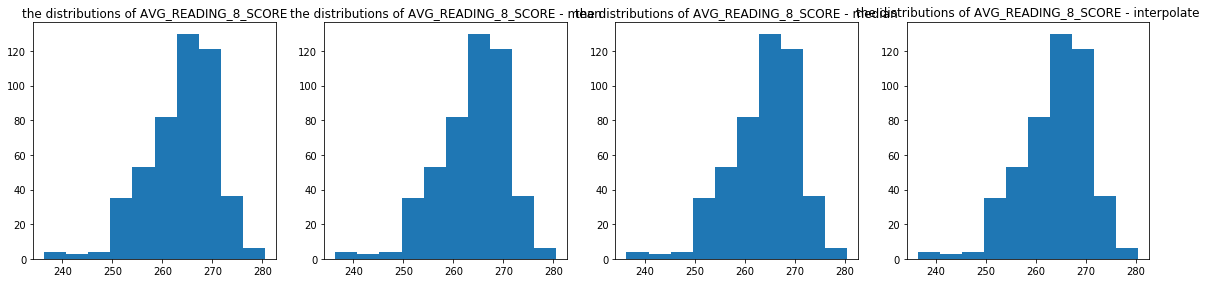

In [40]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_READING_8_SCORE)
plt.title("the distributions of AVG_READING_8_SCORE")

plt.subplot(4,4,2)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean()))
plt.title("the distributions of AVG_READING_8_SCORE - mean")

plt.subplot(4,4,3)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median()))
plt.title("the distributions of AVG_READING_8_SCORE - median")

plt.subplot(4,4,4)
plt.hist(df.AVG_READING_8_SCORE.interpolate())
plt.title("the distributions of AVG_READING_8_SCORE - interpolate")